<a href="https://colab.research.google.com/github/aworklab/everydayPython/blob/main/ex_20230525.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 오늘의 목표
* Customer Analysis 
* Iterators

In [2]:
import pandas as pd
import numpy as np
import plotnine as gg
from plotnine import ggplot, aes
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, date, time, timezone, timedelta 
import os
import re
from functools import reduce 
from collections import defaultdict 
from scipy import stats
from scipy.stats import norm

# Customer Analysis

In [3]:
os.listdir()

['.config',
 'bz_data_analyis.csv',
 'match_result_test.csv',
 'KPMG_VI_New_raw_data_update_final.csv',
 'sales_vs_discount.csv',
 'sample-sales-data.csv',
 'groceries.csv',
 'test.csv',
 'sales_data_with_stores.csv',
 'mall_customers.csv',
 'cookie_cats.csv',
 '1_orders_dataset.csv',
 'lead_conversion.csv',
 'KPMG_VI_New_raw_data_update_final.xlsx',
 '1_order_payments_dataset.csv',
 'online_retail.xlsx',
 'ab_experiment.csv',
 'scanner_data.csv',
 '1_customers_dataset.csv',
 'sales.csv',
 'app_wau.csv',
 'mock_sales_data.csv',
 'online_retail_II.xlsx',
 'ecommerce-data.csv',
 'WA_Fn-UseC_-Marketing-Customer-Value-Analysis.csv',
 'WA_Fn-UseC_-Telco-Customer-Churn.csv',
 'sample_data']

In [15]:
df = pd.read_csv('mall_customers.csv')
df.columns = ['_'.join(re.split('(?=[A-Z][a-zA-Z])', re.sub('\(.+\)|\s', '', a))).lower().lstrip('_') for a in df.columns]
df.head()

,customer_id,gender,age,annual_income,spending_score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   customer_id     200 non-null    int64 
 1   gender          200 non-null    object
 2   age             200 non-null    int64 
 3   annual_income   200 non-null    int64 
 4   spending_score  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [17]:
df.isnull().sum()

customer_id       0
gender            0
age               0
annual_income     0
spending_score    0
dtype: int64

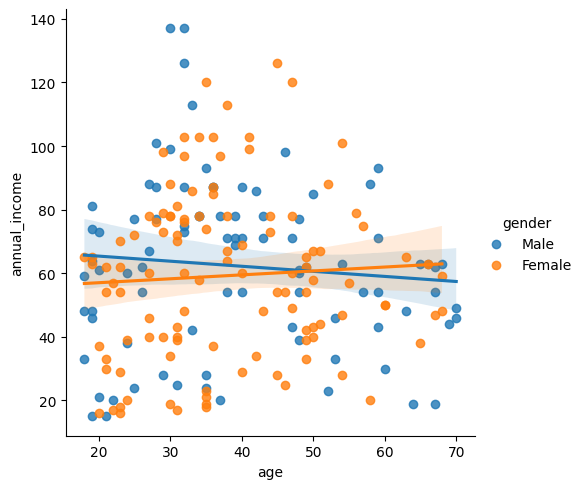

In [19]:
sns.lmplot(data = df, x = 'age', y = 'annual_income', hue = 'gender')
plt.show()

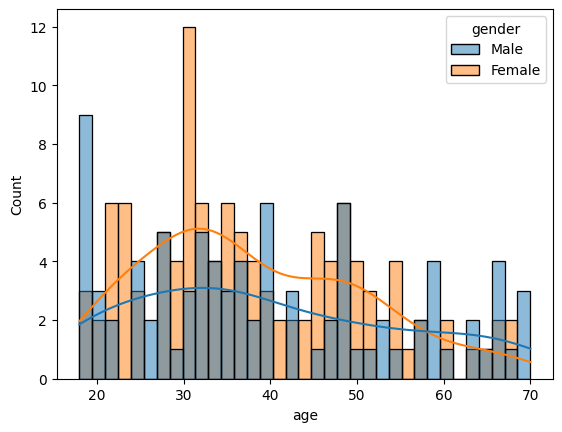

In [20]:
sns.histplot(data = df , x = 'age', hue = 'gender', kde = True, bins = 35)
plt.show()

<ipython-input-21-c29a8587184a>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.


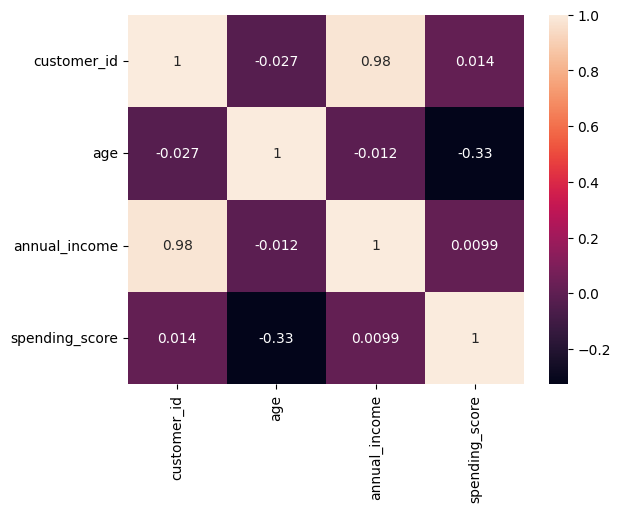

In [21]:
sns.heatmap(df.corr(), annot = True)
plt.show()

# Iterators

In [22]:
users = [{'mail': 'gregorythomas@gmail.com', 'name': 'Brett Holland', 'sex': 'M', 'age': 73},
 {'mail': 'hintoncynthia@hotmail.com', 'name': 'Madison Martinez', 'sex': 'F', 'age': 29},
 {'mail': 'wwagner@gmail.com', 'name': 'Michael Jenkins', 'sex': 'M', 'age': 51},
 {'mail': 'daniel79@gmail.com', 'name': 'Karen Rodriguez', 'sex': 'F', 'age': 32},
 {'mail': 'ujackson@gmail.com', 'name': 'Amber Rhodes', 'sex': 'F', 'age': 42}]
users

[{'mail': 'gregorythomas@gmail.com',
  'name': 'Brett Holland',
  'sex': 'M',
  'age': 73},
 {'mail': 'hintoncynthia@hotmail.com',
  'name': 'Madison Martinez',
  'sex': 'F',
  'age': 29},
 {'mail': 'wwagner@gmail.com',
  'name': 'Michael Jenkins',
  'sex': 'M',
  'age': 51},
 {'mail': 'daniel79@gmail.com',
  'name': 'Karen Rodriguez',
  'sex': 'F',
  'age': 32},
 {'mail': 'ujackson@gmail.com', 'name': 'Amber Rhodes', 'sex': 'F', 'age': 42}]

In [23]:
{k : eval(f'reduce(lambda acc, cur : acc + [cur["{k}"]], [], users)') for k in users[0].keys()}

{'mail': [{'mail': 'gregorythomas@gmail.com',
   'name': 'Brett Holland',
   'sex': 'M',
   'age': 73},
  {'mail': 'hintoncynthia@hotmail.com',
   'name': 'Madison Martinez',
   'sex': 'F',
   'age': 29},
  {'mail': 'wwagner@gmail.com',
   'name': 'Michael Jenkins',
   'sex': 'M',
   'age': 51},
  {'mail': 'daniel79@gmail.com',
   'name': 'Karen Rodriguez',
   'sex': 'F',
   'age': 32},
  {'mail': 'ujackson@gmail.com',
   'name': 'Amber Rhodes',
   'sex': 'F',
   'age': 42}],
 'name': [{'mail': 'gregorythomas@gmail.com',
   'name': 'Brett Holland',
   'sex': 'M',
   'age': 73},
  {'mail': 'hintoncynthia@hotmail.com',
   'name': 'Madison Martinez',
   'sex': 'F',
   'age': 29},
  {'mail': 'wwagner@gmail.com',
   'name': 'Michael Jenkins',
   'sex': 'M',
   'age': 51},
  {'mail': 'daniel79@gmail.com',
   'name': 'Karen Rodriguez',
   'sex': 'F',
   'age': 32},
  {'mail': 'ujackson@gmail.com',
   'name': 'Amber Rhodes',
   'sex': 'F',
   'age': 42}],
 'sex': [{'mail': 'gregorythomas@gmail

In [24]:
{k : [user[k] for user in users] for k in users[0].keys()}

{'mail': ['gregorythomas@gmail.com',
  'hintoncynthia@hotmail.com',
  'wwagner@gmail.com',
  'daniel79@gmail.com',
  'ujackson@gmail.com'],
 'name': ['Brett Holland',
  'Madison Martinez',
  'Michael Jenkins',
  'Karen Rodriguez',
  'Amber Rhodes'],
 'sex': ['M', 'F', 'M', 'F', 'F'],
 'age': [73, 29, 51, 32, 42]}